<a href="https://www.kaggle.com/code/sunblakhan/project-2-predicting-sales-prices-in-ames-lowa?scriptVersionId=222121946" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


This dataset provides various feature contributing in predicting sales price for each property in the city of Ames. Our goal is to predict sales price using linear regression model and see what factors are most valuable in predicting sales price of these properties

# Steps Followed in the Project: 

1. **Data Loading and Inspection:** Imported the dataset using Pandas and inspected its structure, missing values, and data types.

2. **Data Cleaning and Preprocessing:**

- Handled missing values using SimpleImputer.
- Encoded categorical variables using OneHotEncoder and OrdinalEncoder.
- Scaled numerical features using StandardScaler.

3. **Exploratory Data Analysis (EDA):**

- Analyzed the distribution of target variable (housing prices) and its relationship with other features.
- Used visualizations (histograms, scatter plots, heatmaps) to identify trends and correlations.

4. **Feature Engineering:**

- Created new features (e.g., total area, age of the property) to improve model performance.
- Selected relevant features based on correlation analysis and domain knowledge.
- 
5. **Model Building and Evaluation:**

- Split the data into training and testing sets using train_test_split.
- Built and evaluated multiple regression models:
    - Linear Regression
    - Ridge Regression
    - Lasso Regression
    - ElasticNet
    - Random Forest Regressor
    - XGBoost Regressor
    - CatBoost Regressor
- Evaluated models using metrics such as Mean Squared Error (MSE) and R-squared.

6. **Hyperparameter Tuning:**

- Used GridSearchCV and cross-validation to optimize hyperparameters for the best-performing model.

7. **Insights and Visualization:**

- Identified the most important features influencing housing prices.
- Visualized model performance and feature importance using Matplotlib and Seaborn.

In [2]:
import numpy as np 
import pandas as pd 

from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge

In [3]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_df.select_dtypes(include=['object', 'category'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [7]:
train_df.select_dtypes(include=['int64', 'float64']).head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


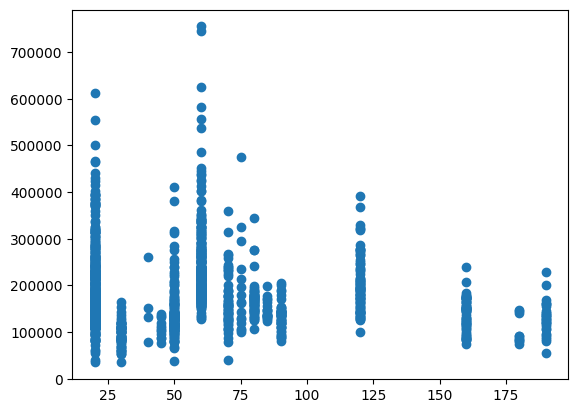

In [8]:
plt.scatter(x = "MSSubClass", y = "SalePrice", data = train_df)

This is more categorical data but they have used it in numerical form that is why it doesn't show any trend with sales price

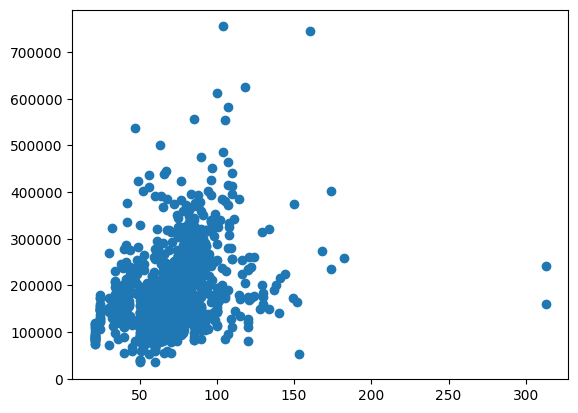

In [9]:
plt.scatter(x = "LotFrontage", y = "SalePrice", data = train_df)

here, we can see a positive relation with a curve going up. Anthing that's greater than 300 are basically outliers

In [10]:
train_df.query("LotFrontage > 300")
#drop 935, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


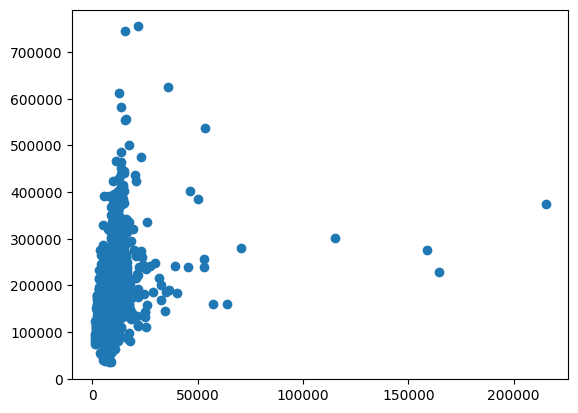

In [11]:
plt.scatter(x = "LotArea", y = "SalePrice", data = train_df)

In [12]:
train_df.query("LotArea > 60000")
#drop 250,314,336,452,707,1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


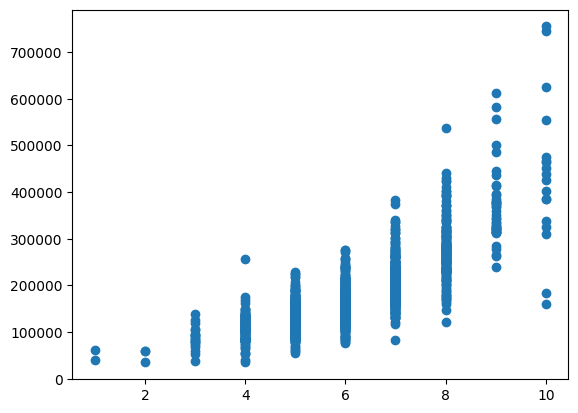

In [13]:
plt.scatter(x = "OverallQual", y = "SalePrice", data = train_df)

In [14]:
train_df.query("OverallQual == 10")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


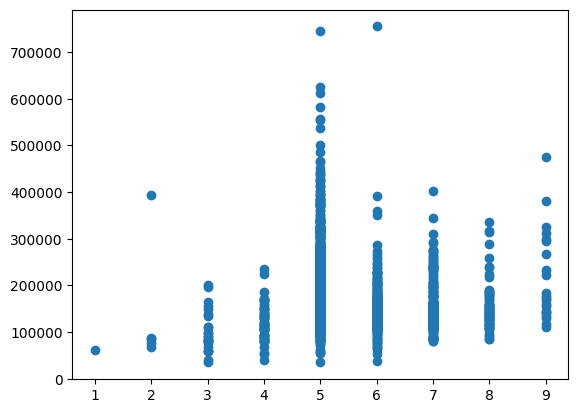

In [15]:
plt.scatter(x = "OverallCond", y = "SalePrice", data = train_df)

In [16]:
train_df.query("OverallCond == 5 & SalePrice > 700000" )
#1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [17]:
train_df.query("OverallCond == 6 & SalePrice > 700000" )
#692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


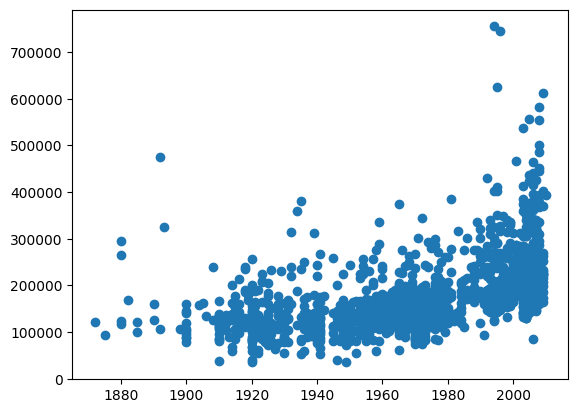

In [18]:
plt.scatter(x = "YearBuilt", y = "SalePrice", data = train_df)

In [19]:
train_df.query("YearBuilt < 1990 & SalePrice > 400000" )
#186 outlier

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


In [20]:
train_df.query("YearBuilt > 1980 & SalePrice > 700000" )
#692, 1182

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


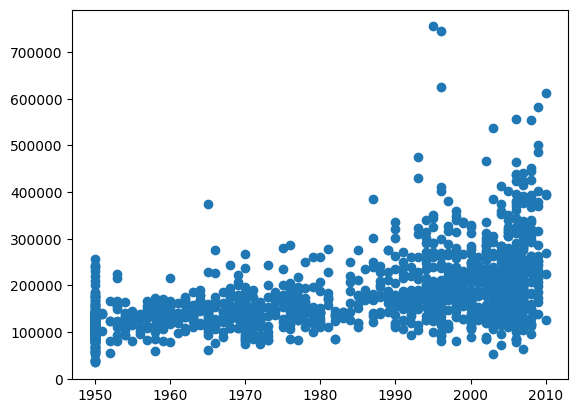

In [21]:
plt.scatter(x = "YearRemodAdd", y = "SalePrice", data = train_df)

In [22]:
train_df.query("YearRemodAdd < 1970 & SalePrice > 300000" )
#314

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


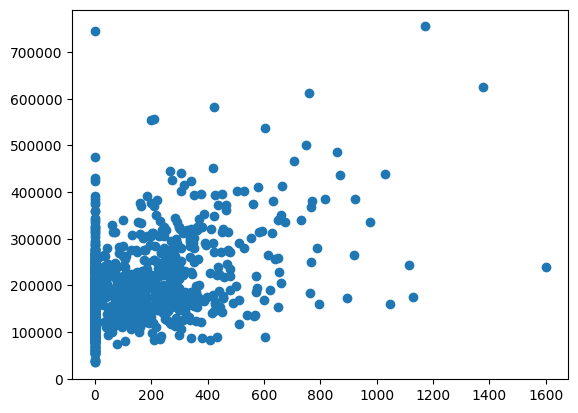

In [23]:
plt.scatter(x = "MasVnrArea", y = "SalePrice", data = train_df)

In [24]:
train_df.query("MasVnrArea > 1500" )
#298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


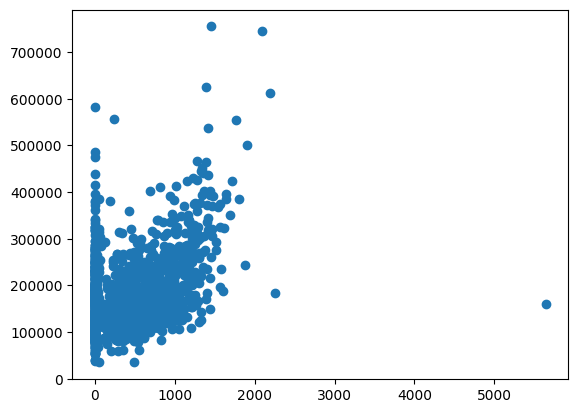

In [25]:
plt.scatter(x = "BsmtFinSF1", y = "SalePrice", data = train_df)

In [26]:
train_df.query("BsmtFinSF1 > 5000 & SalePrice < 200000")
#1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [27]:
train_df.query("BsmtFinSF1 < 2500 & SalePrice > 700000")
#692, 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [28]:
num_df = train_df.select_dtypes(include=['int64', 'float64'])
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

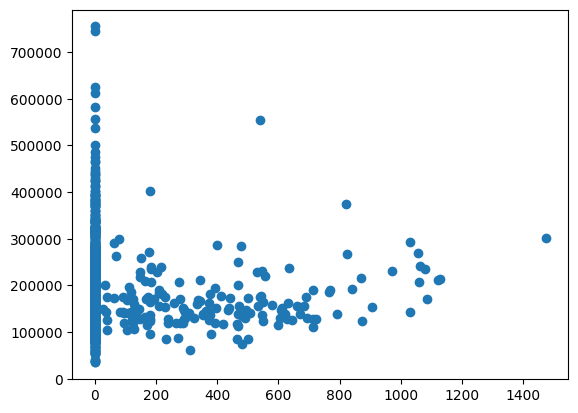

In [29]:
plt.scatter(x = "BsmtFinSF2", y = "SalePrice", data = train_df)

In [30]:
train_df.query("BsmtFinSF2 > 400 & SalePrice > 500000")
#323, 441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


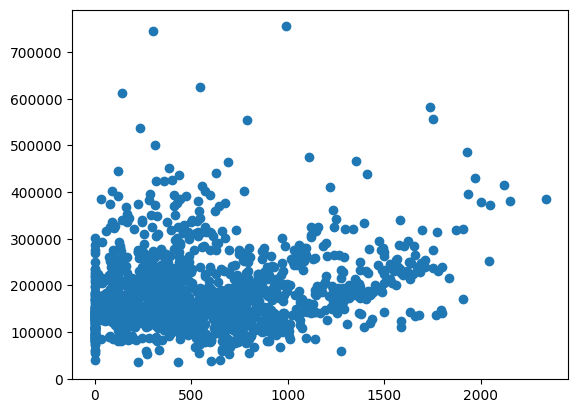

In [31]:
plt.scatter(x = "BsmtUnfSF", y = "SalePrice", data = train_df)

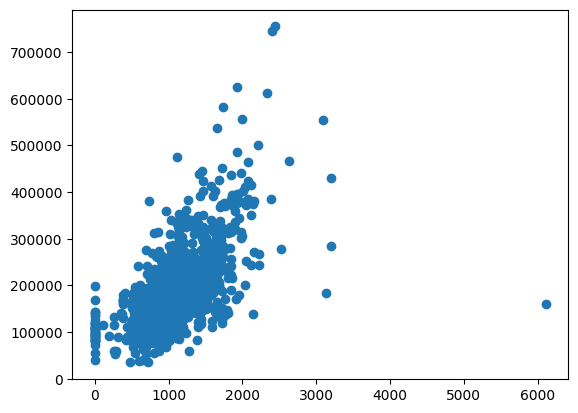

In [32]:
plt.scatter(x = "TotalBsmtSF", y = "SalePrice", data = train_df)

In [33]:
train_df.query("TotalBsmtSF  > 5000")
#1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


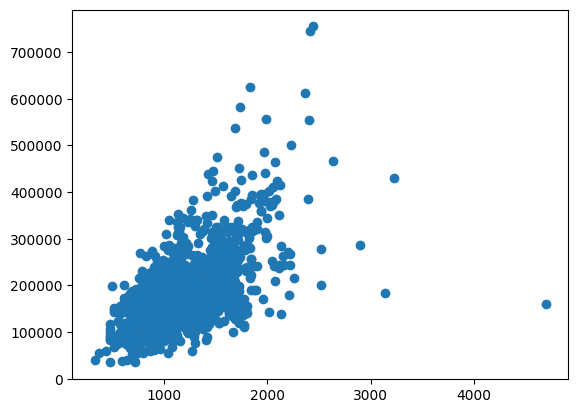

In [34]:
plt.scatter(x = "1stFlrSF", y = "SalePrice", data = train_df)

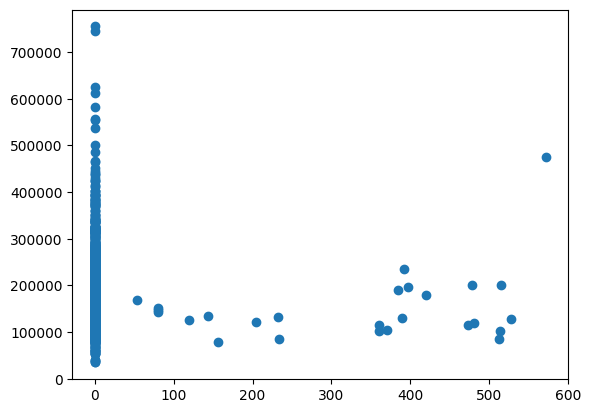

In [35]:
plt.scatter(x = "LowQualFinSF", y = "SalePrice", data = train_df)

In [36]:
train_df.query("LowQualFinSF  > 550")
#186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


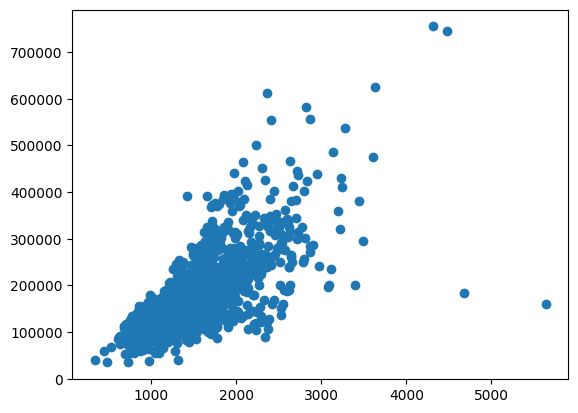

In [37]:
plt.scatter(x = "GrLivArea", y = "SalePrice", data = train_df)

In [38]:
train_df.query("GrLivArea  > 5000")
#1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [39]:
train_df.query("SalePrice  > 700000")
#692, 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


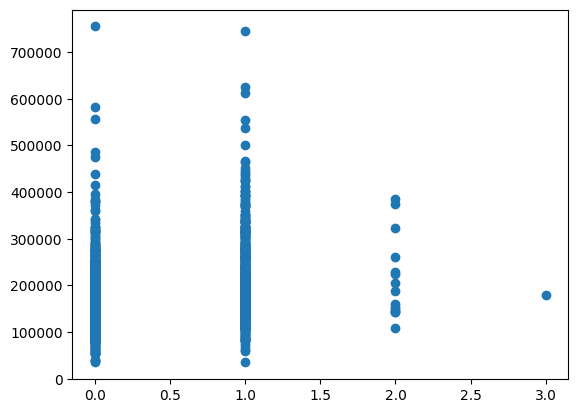

In [40]:
plt.scatter(x = "BsmtFullBath", y = "SalePrice", data = train_df)

In [41]:
train_df.query("BsmtFullBath == 3")
#739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


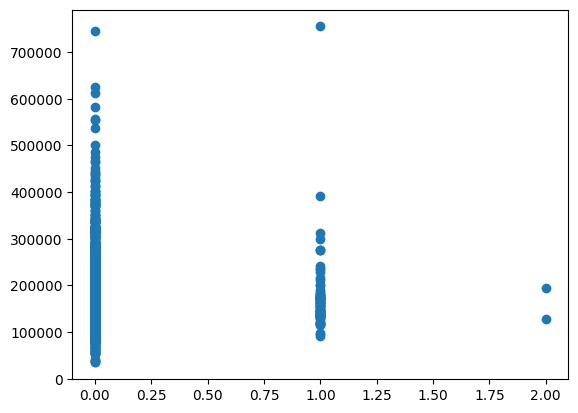

In [42]:
plt.scatter(x = "BsmtHalfBath", y = "SalePrice", data = train_df)

In [43]:
train_df.query("BsmtHalfBath == 2")
#598,955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


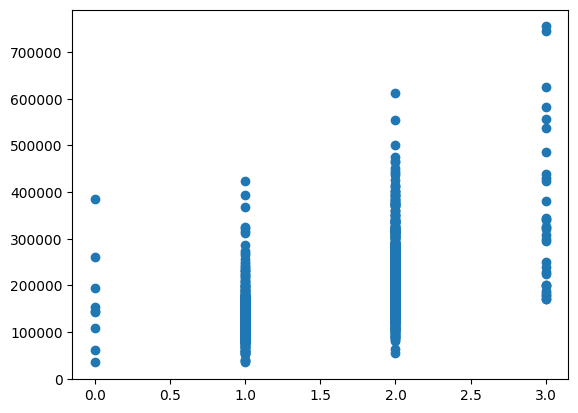

In [44]:
plt.scatter(x = "FullBath", y = "SalePrice", data = train_df)

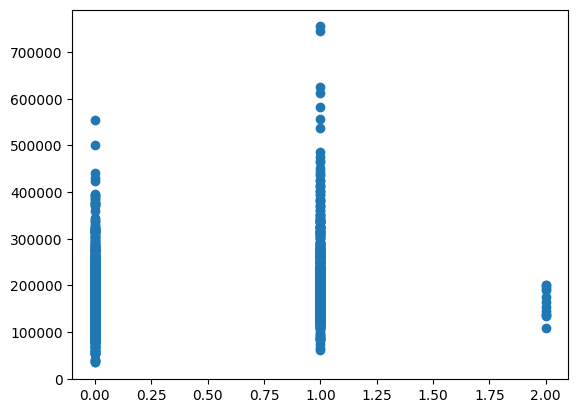

In [45]:
plt.scatter(x = "HalfBath", y = "SalePrice", data = train_df)

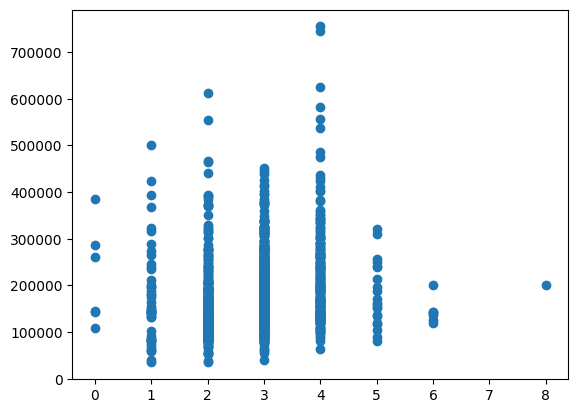

In [46]:
plt.scatter(x = "BedroomAbvGr", y = "SalePrice", data = train_df)

In [47]:
train_df.query("BedroomAbvGr == 8")
#636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


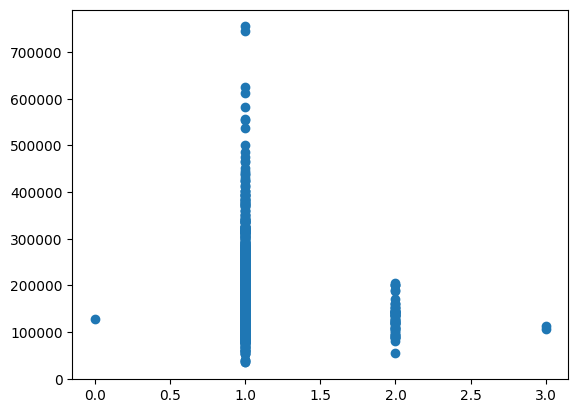

In [48]:
plt.scatter(x = "KitchenAbvGr", y = "SalePrice", data = train_df)

In [49]:
train_df.query("KitchenAbvGr == 3")
#49, 810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


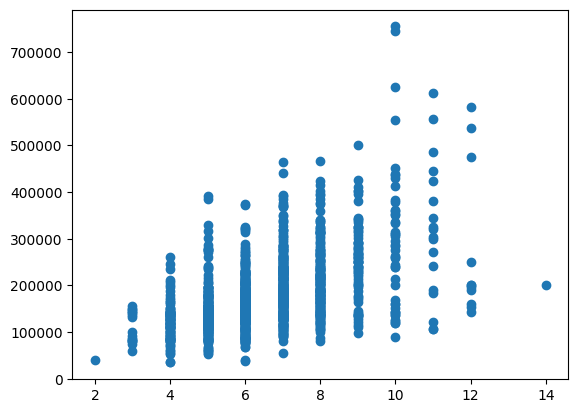

In [50]:
plt.scatter(x = "TotRmsAbvGrd", y = "SalePrice", data = train_df)

In [51]:
train_df.query("TotRmsAbvGrd == 14")
#636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


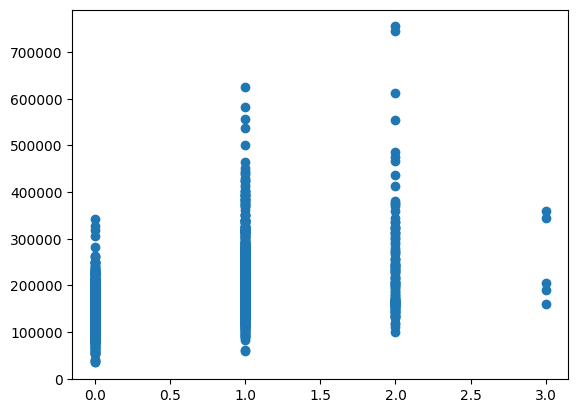

In [52]:
plt.scatter(x = "Fireplaces", y = "SalePrice", data = train_df)

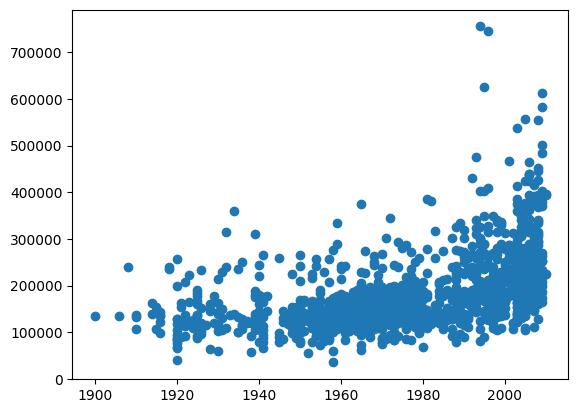

In [53]:
plt.scatter(x = "GarageYrBlt", y = "SalePrice", data = train_df)

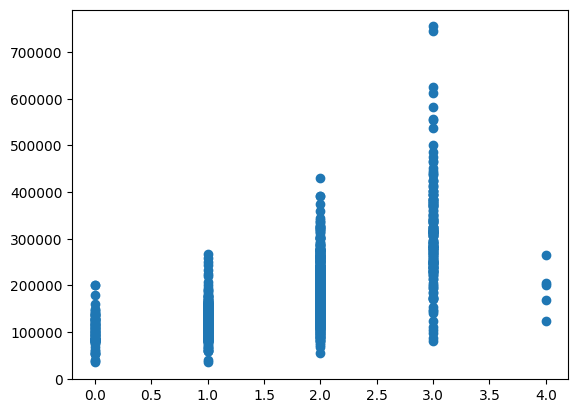

In [54]:
plt.scatter(x = "GarageCars", y = "SalePrice", data = train_df)

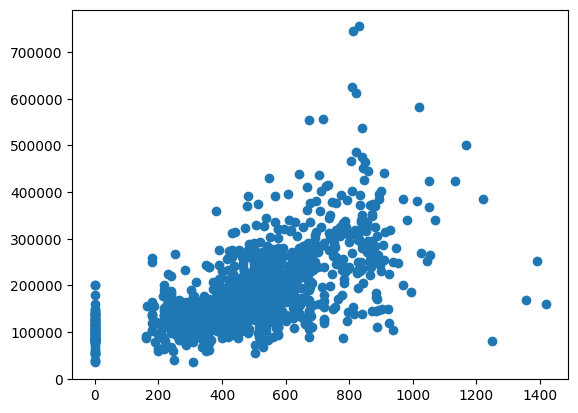

In [55]:
plt.scatter(x = "GarageArea", y = "SalePrice", data = train_df)

In [56]:
train_df.query("GarageArea > 1200")
#582, 826, 1062, 1191, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


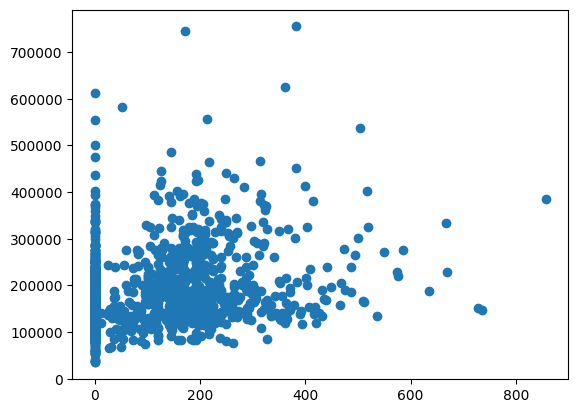

In [57]:
plt.scatter(x = "WoodDeckSF", y = "SalePrice", data = train_df)

In [58]:
train_df.query("WoodDeckSF > 800")
#54

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000


In [59]:
train_df.query("SalePrice > 700000")
#1183, 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


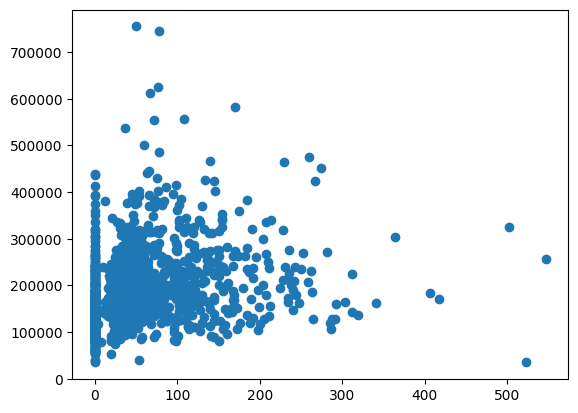

In [60]:
plt.scatter(x = "OpenPorchSF", y = "SalePrice", data = train_df)

In [61]:
train_df.query("OpenPorchSF > 500")
#496, 584, 1329

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


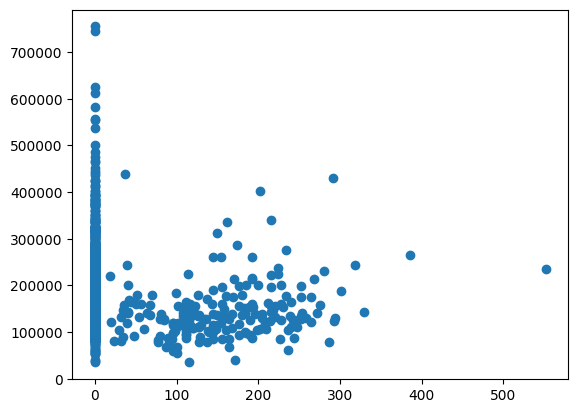

In [62]:
plt.scatter(x = "EnclosedPorch", y = "SalePrice", data = train_df)

In [63]:
train_df.query("EnclosedPorch > 500")
#198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


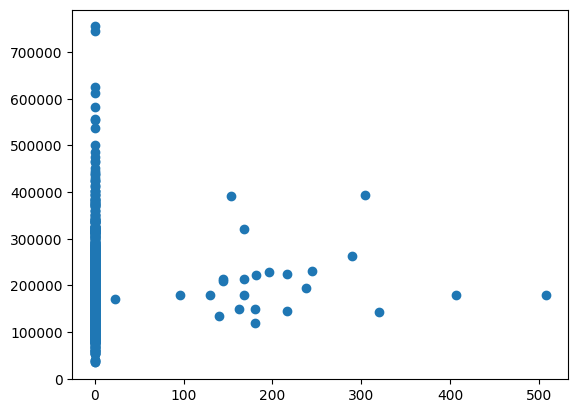

In [64]:
plt.scatter(x = "3SsnPorch", y = "SalePrice", data = train_df)

In [65]:
train_df["3SsnPorch"].unique()

array([  0, 320, 407, 130, 180, 168, 140, 508, 238, 245, 196, 144, 182,
       162,  23, 216,  96, 153, 290, 304])

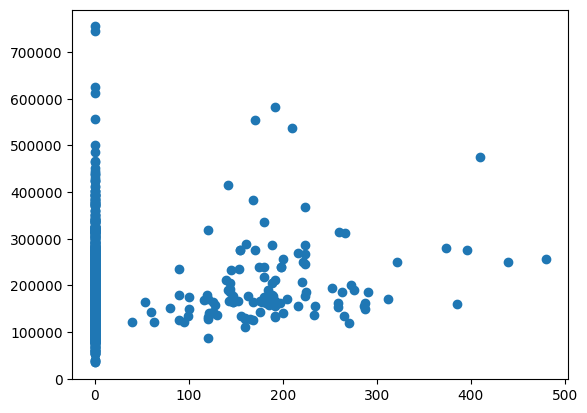

In [66]:
plt.scatter(x = "ScreenPorch", y = "SalePrice", data = train_df)

In [67]:
train_df["ScreenPorch"].unique()

array([  0, 176, 198, 291, 252,  99, 184, 168, 130, 142, 192, 410, 224,
       266, 170, 154, 153, 144, 128, 259, 160, 271, 234, 374, 185, 182,
        90, 396, 140, 276, 180, 161, 145, 200, 122,  95, 120,  60, 126,
       189, 260, 147, 385, 287, 156, 100, 216, 210, 197, 204, 225, 152,
       175, 312, 222, 265, 322, 190, 233,  63,  53, 143, 273, 288, 263,
        80, 163, 116, 480, 178, 440, 155, 220, 119, 165,  40])

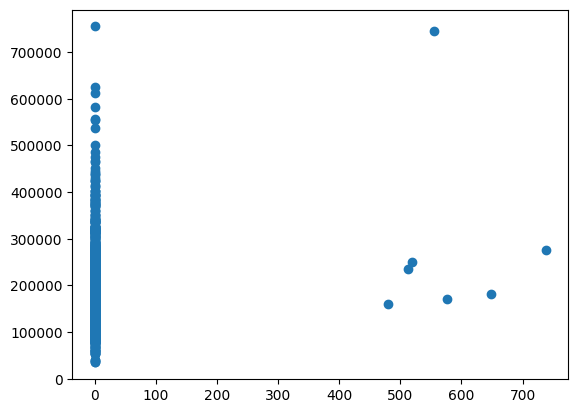

In [68]:
plt.scatter(x = "PoolArea", y = "SalePrice", data = train_df)

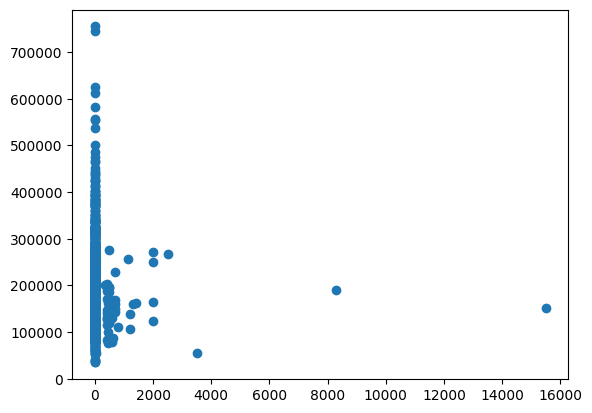

In [69]:
plt.scatter(x = "MiscVal", y = "SalePrice", data = train_df)

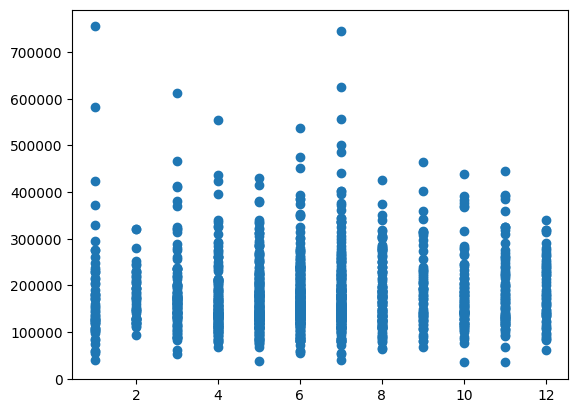

In [70]:
plt.scatter(x = "MoSold", y = "SalePrice", data = train_df)

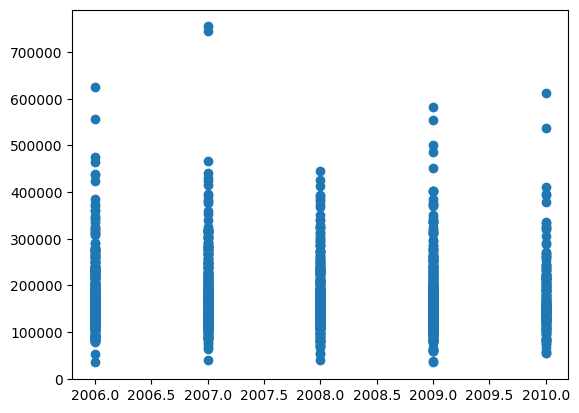

In [71]:
plt.scatter(x = "YrSold", y = "SalePrice", data = train_df)

In [72]:
values = [49, 54, 186, 198, 250, 298, 314, 323, 336, 441, 452, 496, 582, 584, 598, 636, 692, 707, 739, 
          810, 826, 935, 955, 1062, 1182, 1183, 1191, 1299, 1329]

In [73]:
train_df = train_df[train_df.Id.isin(values) == False]

In [74]:
 train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1431 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1431 non-null   int64  
 1   MSSubClass     1431 non-null   int64  
 2   MSZoning       1431 non-null   object 
 3   LotFrontage    1176 non-null   float64
 4   LotArea        1431 non-null   int64  
 5   Street         1431 non-null   object 
 6   Alley          88 non-null     object 
 7   LotShape       1431 non-null   object 
 8   LandContour    1431 non-null   object 
 9   Utilities      1431 non-null   object 
 10  LotConfig      1431 non-null   object 
 11  LandSlope      1431 non-null   object 
 12  Neighborhood   1431 non-null   object 
 13  Condition1     1431 non-null   object 
 14  Condition2     1431 non-null   object 
 15  BldgType       1431 non-null   object 
 16  HouseStyle     1431 non-null   object 
 17  OverallQual    1431 non-null   int64  
 18  OverallCond  

In [75]:
train_df["MiscFeature"].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [76]:
train_df["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [77]:
train_df["Alley"].fillna("No", inplace = True)
test_df["Alley"].fillna("No", inplace = True)

/tmp/ipykernel_30/3175310327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Alley"].fillna("No", inplace = True)
/tmp/ipykernel_30/3175310327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

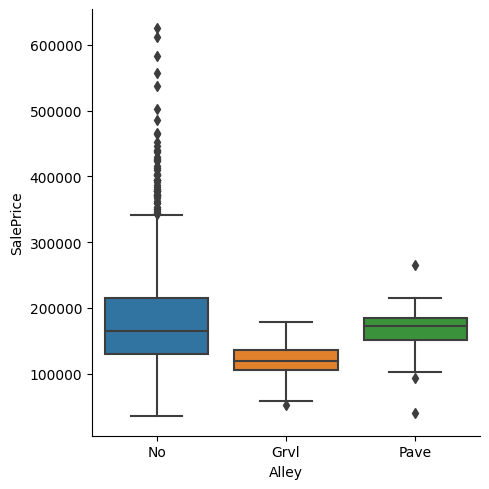

In [78]:
sns.catplot(data = train_df, x = "Alley", y = "SalePrice", kind = "box")

In [79]:
train_df["MiscFeature"].fillna("No", inplace = True)
test_df["MiscFeature"].fillna("No", inplace = True)

/tmp/ipykernel_30/1099713134.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["MiscFeature"].fillna("No", inplace = True)
/tmp/ipykernel_30/1099713134.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

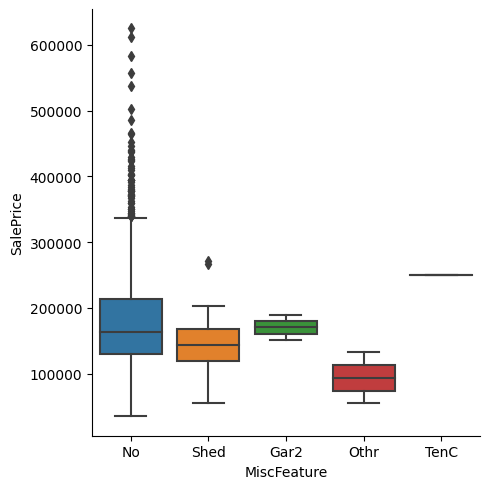

In [80]:
sns.catplot(data = train_df, x = "MiscFeature", y = "SalePrice", kind = "box")

In [81]:
train_df["Fence"].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [82]:
train_df["Fence"].fillna("No", inplace = True)
test_df["Fence"].fillna("No", inplace = True)

/tmp/ipykernel_30/2913115977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Fence"].fillna("No", inplace = True)
/tmp/ipykernel_30/2913115977.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

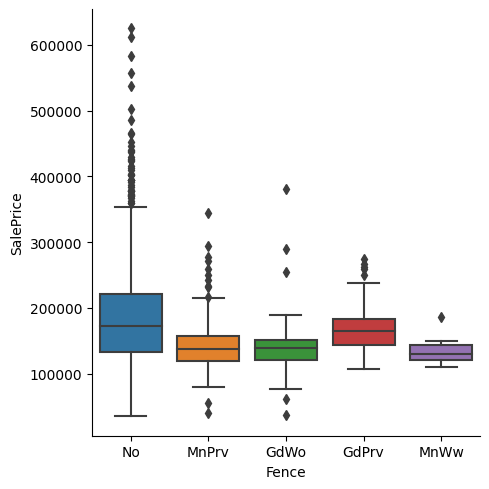

In [83]:
sns.catplot(data = train_df, x = "Fence", y = "SalePrice", kind = "box")

In [84]:
train_df["MasVnrType"].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [85]:
train_df["MasVnrType"].fillna('No', inplace = True)
test_df["MasVnrType"].fillna('No', inplace = True)

/tmp/ipykernel_30/3813964257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["MasVnrType"].fillna('No', inplace = True)
/tmp/ipykernel_30/3813964257.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

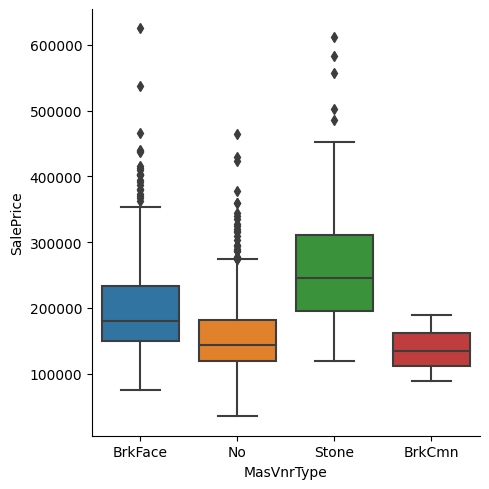

In [86]:
sns.catplot(data = train_df, x = "MasVnrType", y = "SalePrice", kind = "box")

In [87]:
train_df["FireplaceQu"].unique()


array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [88]:
train_df["FireplaceQu"].fillna("No", inplace = True)
test_df["FireplaceQu"].fillna("No", inplace = True) 

/tmp/ipykernel_30/4056329339.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["FireplaceQu"].fillna("No", inplace = True)
/tmp/ipykernel_30/4056329339.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

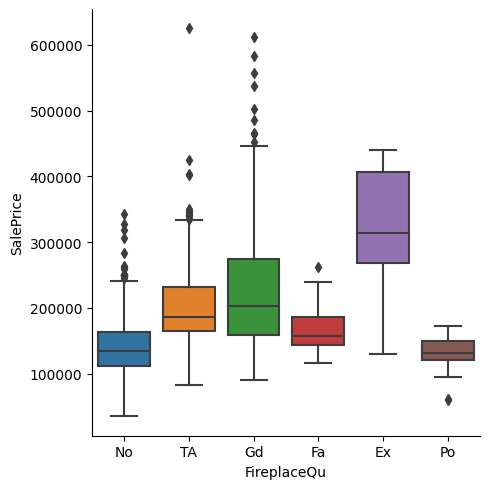

In [89]:
sns.catplot(data = train_df, x = "FireplaceQu", y = "SalePrice", kind = "box")

In [90]:
train_df["Fireplaces"].unique()

array([0, 1, 2, 3])

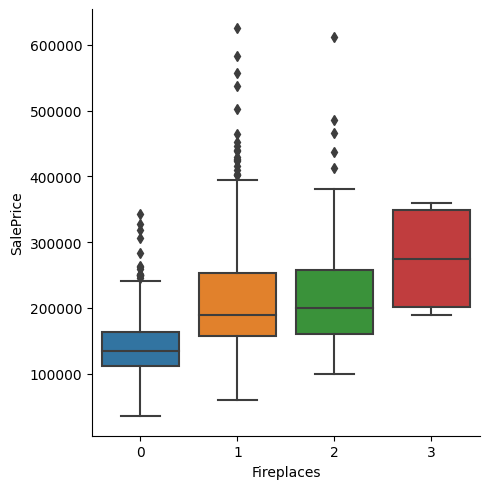

In [91]:
sns.catplot(data = train_df, x = "Fireplaces", y = "SalePrice", kind = "box")

In [92]:
train_df["LotFrontage"].fillna(0, inplace = True)
test_df["LotFrontage"].fillna(0, inplace = True) 

/tmp/ipykernel_30/3844754709.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["LotFrontage"].fillna(0, inplace = True)
/tmp/ipykernel_30/3844754709.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [93]:
train_df["GarageYrBlt"].corr(train_df["YearBuilt"])

0.8305354898081949

In [94]:
train_df["GarageCond"].fillna("No", inplace = True)
test_df["GarageCond"].fillna("No", inplace = True) 

/tmp/ipykernel_30/3417281272.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["GarageCond"].fillna("No", inplace = True)
/tmp/ipykernel_30/3417281272.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

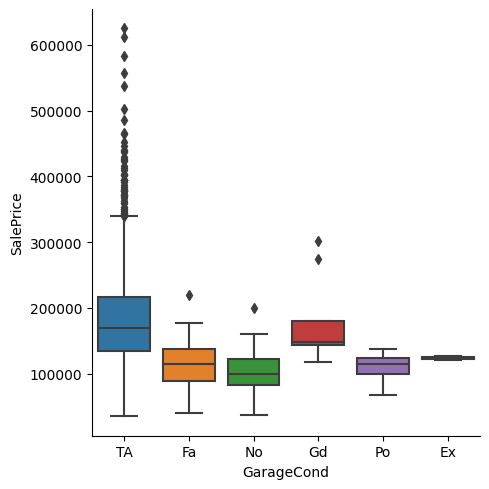

In [95]:
sns.catplot(data = train_df, x = "GarageCond", y = "SalePrice", kind = "box")

In [96]:
train_df["GarageFinish"].fillna("No", inplace = True)
test_df["GarageFinish"].fillna("No", inplace = True) 

/tmp/ipykernel_30/1947373673.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["GarageFinish"].fillna("No", inplace = True)
/tmp/ipykernel_30/1947373673.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

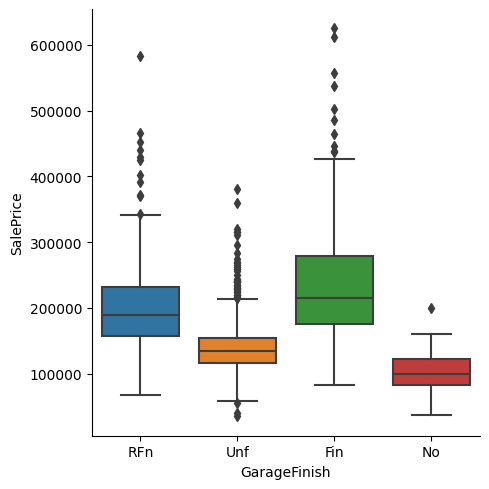

In [97]:
sns.catplot(data = train_df, x = "GarageFinish", y = "SalePrice", kind = "box")

In [98]:
train_df["GarageQual"].fillna("No", inplace = True)
test_df["GarageQual"].fillna("No", inplace = True) 

/tmp/ipykernel_30/3443345044.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["GarageQual"].fillna("No", inplace = True)
/tmp/ipykernel_30/3443345044.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

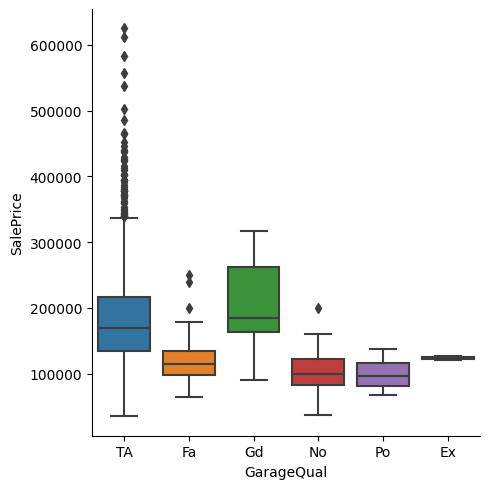

In [99]:
sns.catplot(data = train_df, x = "GarageQual", y = "SalePrice", kind = "box")

In [100]:
train_df["BsmtFinType2"].fillna("Unf", inplace = True)
test_df["BsmtFinType2"].fillna("Unf", inplace = True) 

/tmp/ipykernel_30/4193685060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtFinType2"].fillna("Unf", inplace = True)
/tmp/ipykernel_30/4193685060.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

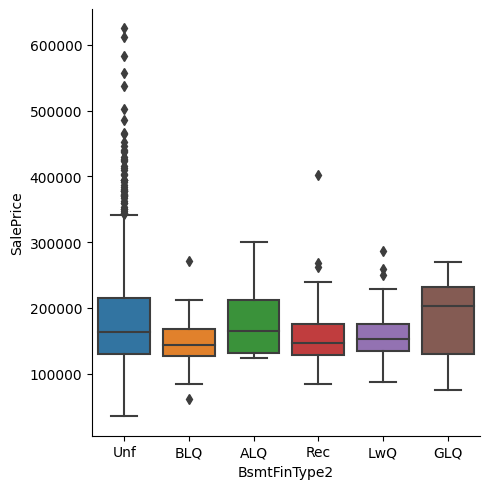

In [101]:
sns.catplot(data = train_df, x = "BsmtFinType2", y = "SalePrice", kind = "box")

In [102]:
train_df["BsmtExposure"].fillna("No", inplace = True)
test_df["BsmtExposure"].fillna("No", inplace = True) 

/tmp/ipykernel_30/1573640079.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtExposure"].fillna("No", inplace = True)
/tmp/ipykernel_30/1573640079.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

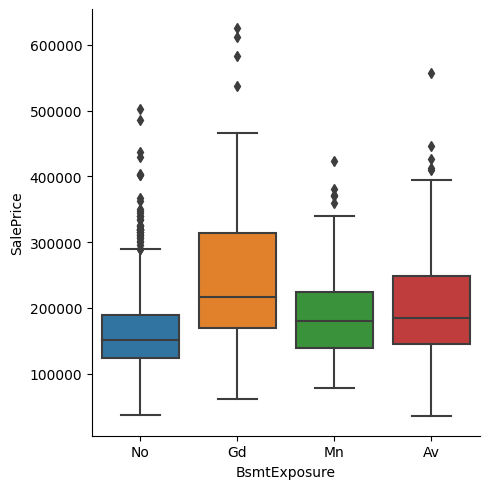

In [103]:
sns.catplot(data = train_df, x = "BsmtExposure", y = "SalePrice", kind = "box")

In [104]:
train_df["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [105]:
train_df["BsmtQual"].fillna("No", inplace = True)
test_df["BsmtQual"].fillna("No", inplace = True) 

/tmp/ipykernel_30/3250015545.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtQual"].fillna("No", inplace = True)
/tmp/ipykernel_30/3250015545.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [106]:
train_df["BsmtCond"].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [107]:
train_df["BsmtCond"].fillna("No", inplace = True)
test_df["BsmtCond"].fillna("No", inplace = True) 

/tmp/ipykernel_30/4105371793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtCond"].fillna("No", inplace = True)
/tmp/ipykernel_30/4105371793.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

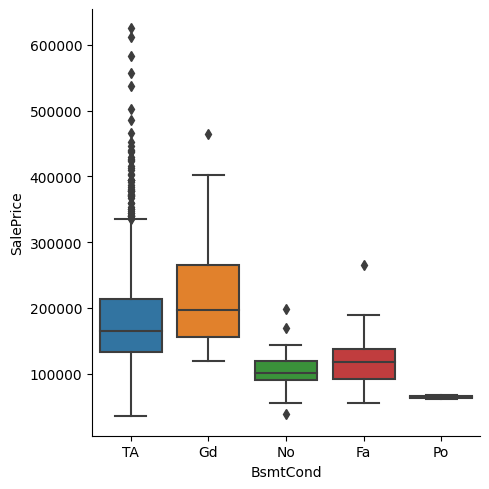

In [108]:
sns.catplot(data = train_df, x = "BsmtCond", y = "SalePrice", kind = "box")

In [109]:
train_df["BsmtFinType1"].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [110]:
train_df["BsmtFinType1"].fillna("Unf", inplace = True)
test_df["BsmtFinType1"].fillna("Unf", inplace = True) 

/tmp/ipykernel_30/3187691808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtFinType1"].fillna("Unf", inplace = True)
/tmp/ipykernel_30/3187691808.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

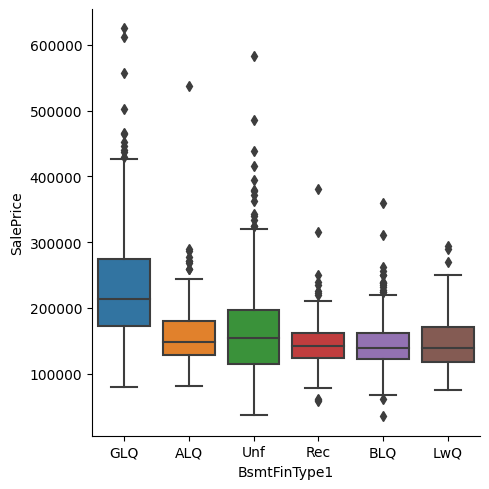

In [111]:
sns.catplot(data = train_df, x = "BsmtFinType1", y = "SalePrice", kind = "box")

In [112]:
train_df["MasVnrArea"].fillna(0, inplace = True)
test_df["MasVnrArea"].fillna(0, inplace = True) 

/tmp/ipykernel_30/1328866567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["MasVnrArea"].fillna(0, inplace = True)
/tmp/ipykernel_30/1328866567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [113]:
train_df["Electrical"].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [114]:
train_df["Electrical"].fillna("SBrkr", inplace = True)
test_df["Electrical"].fillna("SBrkr", inplace = True) 

/tmp/ipykernel_30/2570994226.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Electrical"].fillna("SBrkr", inplace = True)
/tmp/ipykernel_30/2570994226.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

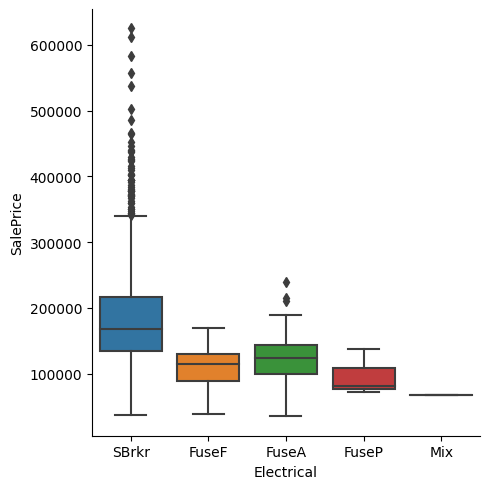

In [115]:
sns.catplot(data = train_df, x = "Electrical", y = "SalePrice", kind = "box")

In [116]:
train_df = train_df.drop(columns = ["PoolQC", "Fence","MiscFeature","GarageYrBlt","Alley"])

In [117]:
test_df = test_df.drop(columns = ["PoolQC", "Fence","MiscFeature","GarageYrBlt","Alley"])

In [118]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1431 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1431 non-null   int64  
 1   MSSubClass     1431 non-null   int64  
 2   MSZoning       1431 non-null   object 
 3   LotFrontage    1431 non-null   float64
 4   LotArea        1431 non-null   int64  
 5   Street         1431 non-null   object 
 6   LotShape       1431 non-null   object 
 7   LandContour    1431 non-null   object 
 8   Utilities      1431 non-null   object 
 9   LotConfig      1431 non-null   object 
 10  LandSlope      1431 non-null   object 
 11  Neighborhood   1431 non-null   object 
 12  Condition1     1431 non-null   object 
 13  Condition2     1431 non-null   object 
 14  BldgType       1431 non-null   object 
 15  HouseStyle     1431 non-null   object 
 16  OverallQual    1431 non-null   int64  
 17  OverallCond    1431 non-null   int64  
 18  YearBuilt    

In [119]:
train_df["HouseAge"] = train_df["YrSold"] - train_df["YearBuilt"]
test_df["HouseAge"] = test_df["YrSold"] - test_df["YearBuilt"]

In [120]:
train_df["HouseRemodelAge"] = train_df["YrSold"] - train_df["YearRemodAdd"]
test_df["HouseRemodelAge"] = test_df["YrSold"] - test_df["YearRemodAdd"]

In [121]:
train_df["TotalFloors"] = train_df["1stFlrSF"] + train_df["2ndFlrSF"] + train_df["BsmtFinSF1"] + train_df["BsmtFinSF2"]
test_df["TotalFloors"] = test_df["1stFlrSF"] + test_df["2ndFlrSF"] + test_df["BsmtFinSF1"] + test_df["BsmtFinSF2"]

In [122]:
train_df["TotalArea"] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]
train_df["TotalArea"] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]

In [123]:
train_df["TotalBathrooms"] = train_df["BsmtFullBath"] + train_df["FullBath"] + ( 0.5 *(train_df["HalfBath"] + train_df["BsmtHalfBath"]) )
test_df["TotalBathrooms"] = test_df["BsmtFullBath"]  + test_df["FullBath"] + ( 0.5 *(test_df["HalfBath"] + test_df["BsmtHalfBath"]) )

In [124]:
train_df["Totalporschfloor"] = train_df["OpenPorchSF"] + train_df["EnclosedPorch"] + train_df["3SsnPorch"] + train_df["ScreenPorch"]
test_df["Totalporschfloor"] = test_df["OpenPorchSF"] + test_df["EnclosedPorch"] + test_df["3SsnPorch"] + test_df["ScreenPorch"]

In [125]:
train_df = train_df.drop(columns = ["YrSold", "YearBuilt","YearRemodAdd","1stFlrSF","2ndFlrSF","BsmtFinSF1","BsmtFinSF2","GrLivArea","TotalBsmtSF"
                                   ,"BsmtFullBath","FullBath","HalfBath","BsmtHalfBath","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"])
test_df = test_df.drop(columns = ["YrSold", "YearBuilt","YearRemodAdd","1stFlrSF","2ndFlrSF","BsmtFinSF1","BsmtFinSF2","GrLivArea","TotalBsmtSF"
                                   ,"BsmtFullBath","FullBath","HalfBath","BsmtHalfBath","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"])

In [126]:
train_df = train_df.drop(columns = ["Id"])


In [127]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1431 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1431 non-null   int64  
 1   MSZoning          1431 non-null   object 
 2   LotFrontage       1431 non-null   float64
 3   LotArea           1431 non-null   int64  
 4   Street            1431 non-null   object 
 5   LotShape          1431 non-null   object 
 6   LandContour       1431 non-null   object 
 7   Utilities         1431 non-null   object 
 8   LotConfig         1431 non-null   object 
 9   LandSlope         1431 non-null   object 
 10  Neighborhood      1431 non-null   object 
 11  Condition1        1431 non-null   object 
 12  Condition2        1431 non-null   object 
 13  BldgType          1431 non-null   object 
 14  HouseStyle        1431 non-null   object 
 15  OverallQual       1431 non-null   int64  
 16  OverallCond       1431 non-null   int64  
 17  

In [128]:
train_df["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [129]:
train_df["GarageType"].fillna("No", inplace = True)
test_df["GarageType"].fillna("No", inplace = True) 

/tmp/ipykernel_30/674601389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["GarageType"].fillna("No", inplace = True)
/tmp/ipykernel_30/674601389.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [130]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1431 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1431 non-null   int64  
 1   MSZoning          1431 non-null   object 
 2   LotFrontage       1431 non-null   float64
 3   LotArea           1431 non-null   int64  
 4   Street            1431 non-null   object 
 5   LotShape          1431 non-null   object 
 6   LandContour       1431 non-null   object 
 7   Utilities         1431 non-null   object 
 8   LotConfig         1431 non-null   object 
 9   LandSlope         1431 non-null   object 
 10  Neighborhood      1431 non-null   object 
 11  Condition1        1431 non-null   object 
 12  Condition2        1431 non-null   object 
 13  BldgType          1431 non-null   object 
 14  HouseStyle        1431 non-null   object 
 15  OverallQual       1431 non-null   int64  
 16  OverallCond       1431 non-null   int64  
 17  

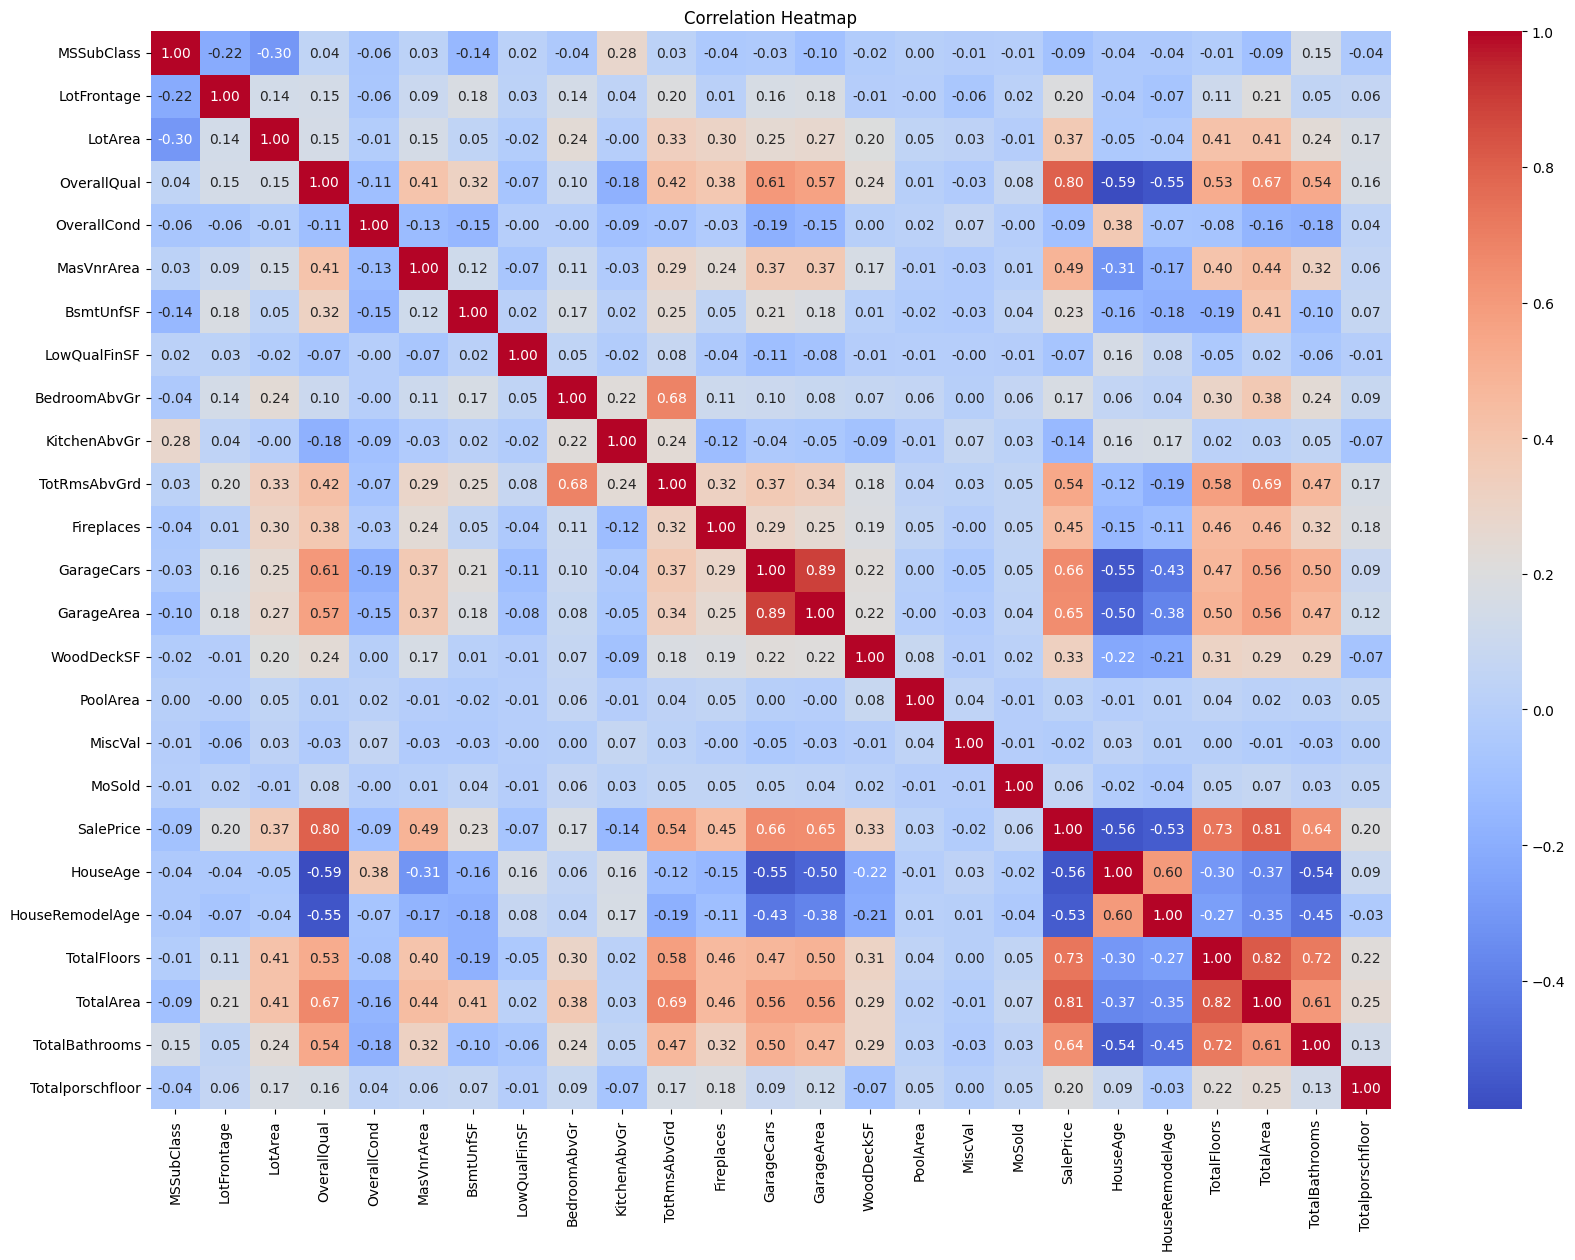

In [131]:
correlation_matrix = train_df.corr(numeric_only = True)
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [132]:
train_df["BedroomAbvGr"].unique() 

array([3, 4, 1, 2, 5, 6, 0])

In [133]:
train_df = train_df.drop(columns = ["GarageCars","TotRmsAbvGrd","MiscVal","PoolArea","LowQualFinSF","KitchenAbvGr"])
test_df = test_df.drop(columns = ["GarageCars","TotRmsAbvGrd","MiscVal","PoolArea","LowQualFinSF","KitchenAbvGr"])

In [134]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1431 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1431 non-null   int64  
 1   MSZoning          1431 non-null   object 
 2   LotFrontage       1431 non-null   float64
 3   LotArea           1431 non-null   int64  
 4   Street            1431 non-null   object 
 5   LotShape          1431 non-null   object 
 6   LandContour       1431 non-null   object 
 7   Utilities         1431 non-null   object 
 8   LotConfig         1431 non-null   object 
 9   LandSlope         1431 non-null   object 
 10  Neighborhood      1431 non-null   object 
 11  Condition1        1431 non-null   object 
 12  Condition2        1431 non-null   object 
 13  BldgType          1431 non-null   object 
 14  HouseStyle        1431 non-null   object 
 15  OverallQual       1431 non-null   int64  
 16  OverallCond       1431 non-null   int64  
 17  

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

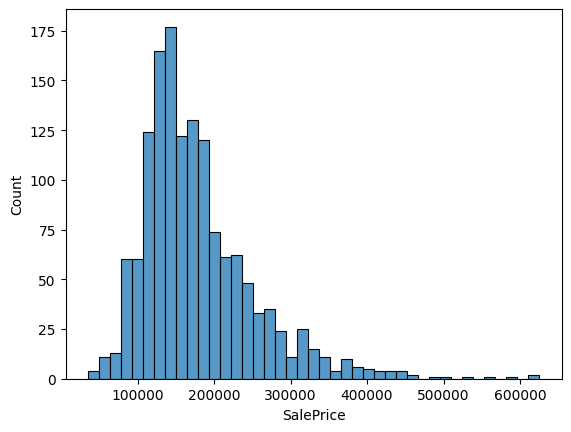

In [135]:
sns.histplot(
    train_df,
    x = train_df["SalePrice"]
)


In [136]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

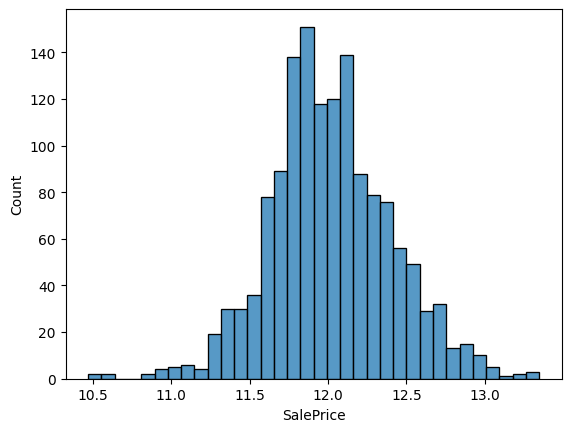

In [137]:
sns.histplot(
    train_df,
    x = train_df["SalePrice"]
)


In [138]:
train_df.dtypes[train_df.dtypes=="object" ]

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [139]:
train_df.dtypes [train_df.dtypes!="object" ]

MSSubClass            int64
LotFrontage         float64
LotArea               int64
OverallQual           int64
OverallCond           int64
MasVnrArea          float64
BsmtUnfSF             int64
BedroomAbvGr          int64
Fireplaces            int64
GarageArea            int64
WoodDeckSF            int64
MoSold                int64
SalePrice           float64
HouseAge              int64
HouseRemodelAge       int64
TotalFloors           int64
TotalArea             int64
TotalBathrooms      float64
Totalporschfloor      int64
dtype: object

In [140]:
ordinal_columns = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1', 'BsmtFinType2',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond','GarageCond']

In [141]:
nominal_columns = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [142]:
numericals_columns = train_df.select_dtypes(include=["int64", "float64"]).columns
numericals_columns = numericals_columns.drop("SalePrice")

In [143]:
numeric_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

In [144]:
ordinal_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

In [145]:
nominal_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("nominal",  OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [146]:
columns_transformers = ColumnTransformer(transformers=[
    ('num_p', numeric_pipeline, numericals_columns),
    ('ode_p', ordinal_pipeline, ordinal_columns),
    ('ohe_p', nominal_pipeline, nominal_columns),
    ],
    remainder='passthrough', 
    n_jobs=-1)

In [147]:
pipeline = Pipeline(steps=[
    ('preprocessing', columns_transformers)
])

In [148]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [149]:
X_preprocessed = pipeline.fit_transform(X)

In [150]:
X_preprocessed

array([[ 0.08150054,  0.24346717, -0.29219236, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87250578,  0.69798299, -0.06476753, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08150054,  0.33437033,  0.26153765, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.32000212,  0.27376823, -0.17511802, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87250578,  0.33437033, -0.04162953, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87250578,  0.54647771,  0.00187783, ...,  0.        ,
         0.        ,  0.        ]])

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

In [152]:
linearRegressionModel = LinearRegression()

In [153]:
linearRegressionModel.fit(X_train, y_train)

LinearRegression()

In [154]:
y_pred_lr = linearRegressionModel.predict(X_test)

In [155]:
mean_squared_error(y_test, y_pred_lr)

1.0378761549334982e+18

In [ ]:
RFR = RandomForestRegressor(random_state=13)

In [ ]:
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [ ]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
rfr_cv.fit(X_train, y_train)

In [ ]:
np.sqrt(-1 * rfr_cv.best_score_)

In [161]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 500}

In [162]:
XGB = XGBRegressor(random_state=13)

In [ ]:
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [164]:
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
xgb_cv.fit(X_train, y_train)

In [ ]:
np.sqrt(-1 * xgb_cv.best_score_)

In [167]:
ridge = Ridge()

In [168]:
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

In [169]:
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [170]:
ridge_cv.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [171]:
np.sqrt(-1 * ridge_cv.best_score_)

0.1242389891620987

In [172]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

In [173]:
param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 1000],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

In [174]:
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [175]:
GBR_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [176]:
np.sqrt(-1 * GBR_cv.best_score_)

0.12037931415318603

In [177]:
import lightgbm as lgb
lgbm_regressor = lgb.LGBMRegressor()

In [178]:
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

In [179]:
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)


In [180]:
lgbm_cv.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2042
[LightGBM] [Info] Number of data points in the train set: 762, number of used features: 103
[LightGBM] [Info] Start training from score 12.026624
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2042
[LightGBM] [Info] Number of data points in the train set: 762, number of used features: 103
[LightGBM] [Info] Start training from score 12.026624
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='neg_mean_squared_error')

In [181]:
np.sqrt(-1 * lgbm_cv.best_score_)

0.1319458376926231

In [182]:
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

In [183]:
param_grid_cat ={
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [184]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [185]:
cat_cv.fit(X_train, y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7ebda296bbe0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [186]:
np.sqrt(-1 * cat_cv.best_score_)

0.11836914398021355

In [187]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('gbr', GBR_cv.best_estimator_),
                      ('xgb', xgb_cv.best_estimator_),
                      ('ridge', ridge_cv.best_estimator_)],
                    weights=[2,3,1])

In [188]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=20,
                                                       max_features=0.1,
                                                       min_samples_leaf=25,
                                                       n_estimators=1000)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_m...
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.05, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=13, ...)),
                            ('ridge', Ridge(alpha=10))],
                weights=[2, 3, 1])

In [189]:
y_pred_vr = vr.predict(X_test)

In [190]:
mean_squared_error(y_test, y_pred_vr, squared=False)

0.11165744635543809

In [191]:
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [192]:
stackreg = StackingRegressor(
            estimators = estimators,
            final_estimator = vr
)

NameError: name 'StackingRegressor' is not defined

In [ ]:
stackreg.fit(X_train, y_train)

In [ ]:
y_pred_stack = stackreg.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred_stack, squared=False)

In [ ]:
df_test_preprocess = pipeline.transform(test_df)

In [ ]:
y_stacking = np.exp(stackreg.predict(df_test_preprocess))

df_y_stacking_out = test_df[['Id']]
df_y_stacking_out['SalePrice'] = y_stacking

df_y_stacking_out.to_csv('final results.csv', index=False)

# Summary:
In this project, I analyzed the Ames housing dataset to predict property prices using various regression models. Key insights include:


* Feature Importance: Features such as property size, location, and overall condition were the most significant predictors of housing prices.
* Model Performance: Ensemble methods like XGBoost and CatBoost outperformed traditional linear models, achieving the lowest Mean Squared Error (MSE) and highest R-squared values.
* Hyperparameter Tuning: Optimizing hyperparameters using GridSearchCV significantly improved model performance.
* Data Quality: Handling missing values and encoding categorical variables were critical steps in improving prediction accuracy.


This project reinforced my skills in regression modeling, feature engineering, and model evaluation, while providing practical insights into real-world data analysis.